In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df1 = pd.read_csv("mpu6050_data_flat_standing.csv")
df1 = df1.copy()
for axis in ['Gx', 'Gy', 'Gz']:
    df1[f'{axis}_deg'] = df1[axis] / 131.0  # degrees/sec
    df1[f'{axis}_rad'] = np.deg2rad(df1[f'{axis}_deg'])  # radians/sec
df1['gyro_mag_rad'] = np.sqrt(df1['Gx_rad']**2 + df1['Gy_rad']**2 + df1['Gz_rad']**2)
df1.loc[:, "Acceleration"] = np.sqrt(df1['Ax']**2 + df1['Ay']**2 + df1['Az']**2)
df1.loc[:, "Outcome"] = "Standing"
df2 = pd.read_csv("mpu6050_data_fall_detection.csv")
df2 = df2.copy()
for axis in ['Gx', 'Gy', 'Gz']:
    df2[f'{axis}_deg'] = df2[axis] / 131.0  # degrees/sec
    df2[f'{axis}_rad'] = np.deg2rad(df2[f'{axis}_deg'])  # radians/sec
df2['gyro_mag_rad'] = np.sqrt(df2['Gx_rad']**2 + df2['Gy_rad']**2 + df2['Gz_rad']**2)
df2.loc[:, "Acceleration"] = np.sqrt(df2['Ax']**2 + df2['Ay']**2 + df2['Az']**2)
df2.loc[:, "Outcome"] = "Fall"
df3 = pd.read_csv("mpu6050_data_acceleration1.csv")
df3 = df3.copy()
for axis in ['Gx', 'Gy', 'Gz']:
    df3[f'{axis}_deg'] = df3[axis] / 131.0  # degrees/sec
    df3[f'{axis}_rad'] = np.deg2rad(df3[f'{axis}_deg'])  # radians/sec
df3['gyro_mag_rad'] = np.sqrt(df3['Gx_rad']**2 + df3['Gy_rad']**2 + df3['Gz_rad']**2)
df3.loc[:, "Acceleration"] = np.sqrt(df3['Ax']**2 + df3['Ay']**2 + df3['Az']**2)
df3.loc[:, "Outcome"] = "collision"
df = pd.concat([df1, df2, df3], ignore_index=True)
df

FileNotFoundError: [Errno 2] No such file or directory: 'mpu6050_data_flat_standing.csv'

In [ ]:
mpu_sensor_collected_data = pd.

C:\Users\Sonu\AppData\Local\Temp\ipykernel_20920\4073048981.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Acceleration', data=df, palette='Set2')


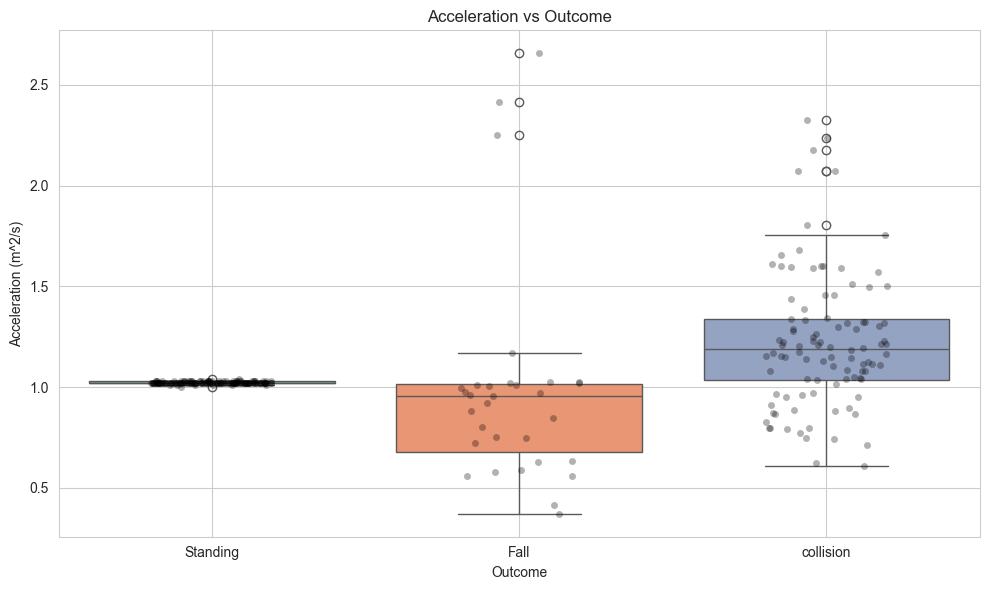

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Acceleration vs Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Acceleration', data=df, palette='Set2')
sns.stripplot(x='Outcome', y='Acceleration', data=df, color='black', alpha=0.3, jitter=0.2)

plt.title('Acceleration vs Outcome')
plt.ylabel('Acceleration (m^2/s)')
plt.xlabel('Outcome')
plt.grid(True)
plt.tight_layout()
plt.savefig("Acceleration vs Outcome")
plt.show()


C:\Users\Sonu\AppData\Local\Temp\ipykernel_20920\3348889535.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='gyro_mag_rad', data=df, palette='Set2')


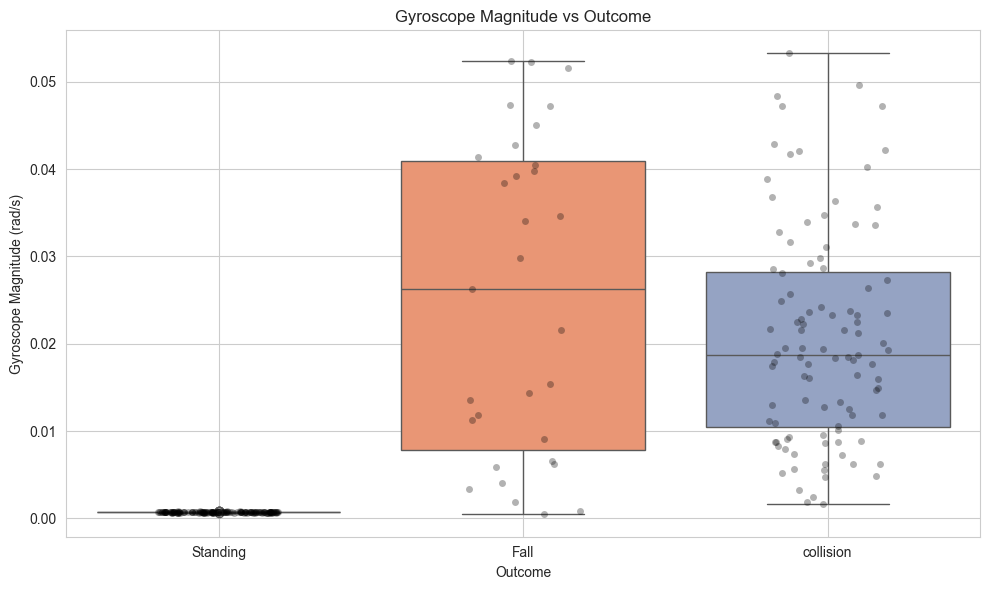

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Gyroscope Magnitude vs Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='gyro_mag_rad', data=df, palette='Set2')
sns.stripplot(x='Outcome', y='gyro_mag_rad', data=df, color='black', alpha=0.3, jitter=0.2)

plt.title('Gyroscope Magnitude vs Outcome')
plt.ylabel('Gyroscope Magnitude (rad/s)')
plt.xlabel('Outcome')
plt.grid(True)
plt.tight_layout()
plt.savefig("Gyroscope_Magnitude_vs_Outcome.png")
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

le = LabelEncoder()
df['label'] = le.fit_transform(df['Outcome'])

feature_cols = [
    'Ax', 'Ay', 'Az',
    'Gx', 'Gy', 'Gz',
    'Gx_rad', 'Gy_rad', 'Gz_rad',
    'gyro_mag_rad',
    'Acceleration'
]

X = df[feature_cols]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Function to predict new outcomes
def predict_outcome(new_df):
    new_df['label_pred'] = clf.predict(new_df[feature_cols])
    new_df['Outcome_predicted'] = le.inverse_transform(new_df['label_pred'])
    return new_df[['timestamp'] + feature_cols + ['Outcome_predicted']]


Accuracy: 0.9464285714285714
              precision    recall  f1-score   support

        Fall       1.00      0.50      0.67         6
    Standing       0.97      1.00      0.98        30
   collision       0.91      1.00      0.95        20

    accuracy                           0.95        56
   macro avg       0.96      0.83      0.87        56
weighted avg       0.95      0.95      0.94        56



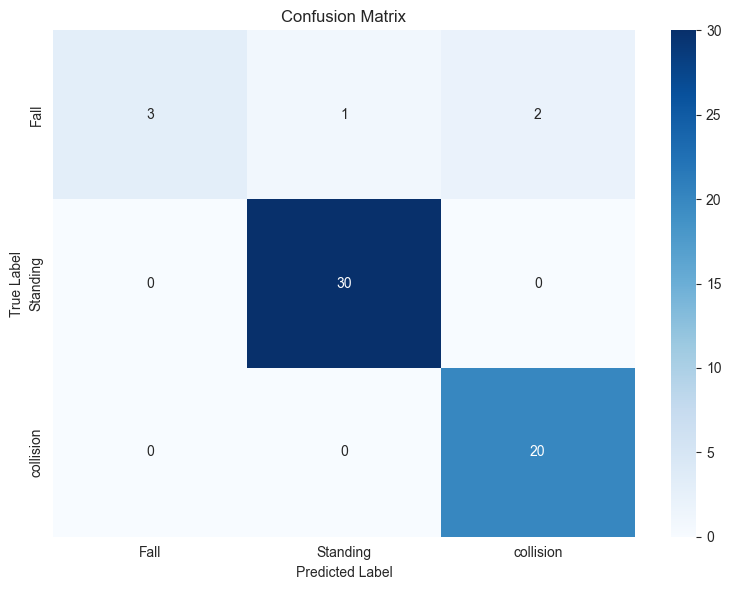

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("conf_mat")
plt.show()


In [ ]:
# Grouping by Outcome and getting descriptive statistics
threshold_stats = df.groupby('Outcome')[['Acceleration', 'gyro_mag_rad']].describe()

# Show mean ± std for each class to estimate thresholds
for outcome in df['Outcome'].unique():
    acc_mean = df[df['Outcome'] == outcome]['Acceleration'].mean()
    acc_std = df[df['Outcome'] == outcome]['Acceleration'].std()
    gyro_mean = df[df['Outcome'] == outcome]['gyro_mag_rad'].mean()
    gyro_std = df[df['Outcome'] == outcome]['gyro_mag_rad'].std()

    print(f"\n--- {outcome.upper()} ---")
    print(f"Acceleration: Mean = {acc_mean:.2f}, Std = {acc_std:.2f}")
    print(f"gyro_mag_rad: Mean = {gyro_mean:.2f}, Std = {gyro_std:.2f}")
    print(f"Suggested Acceleration Threshold: {acc_mean - acc_std:.2f} to {acc_mean + acc_std:.2f}")
    print(f"Suggested Gyro Threshold: {gyro_mean - gyro_std:.2f} to {gyro_mean + gyro_std:.2f}")



--- STANDING ---
Acceleration: Mean = 1.02, Std = 0.01
gyro_mag_rad: Mean = 0.00, Std = 0.00
Suggested Acceleration Threshold: 1.02 to 1.03
Suggested Gyro Threshold: 0.00 to 0.00

--- FALL ---
Acceleration: Mean = 0.98, Std = 0.53
gyro_mag_rad: Mean = 0.03, Std = 0.02
Suggested Acceleration Threshold: 0.46 to 1.51
Suggested Gyro Threshold: 0.01 to 0.04

--- COLLISION ---
Acceleration: Mean = 1.23, Std = 0.34
gyro_mag_rad: Mean = 0.02, Std = 0.01
Suggested Acceleration Threshold: 0.89 to 1.57
Suggested Gyro Threshold: 0.01 to 0.03


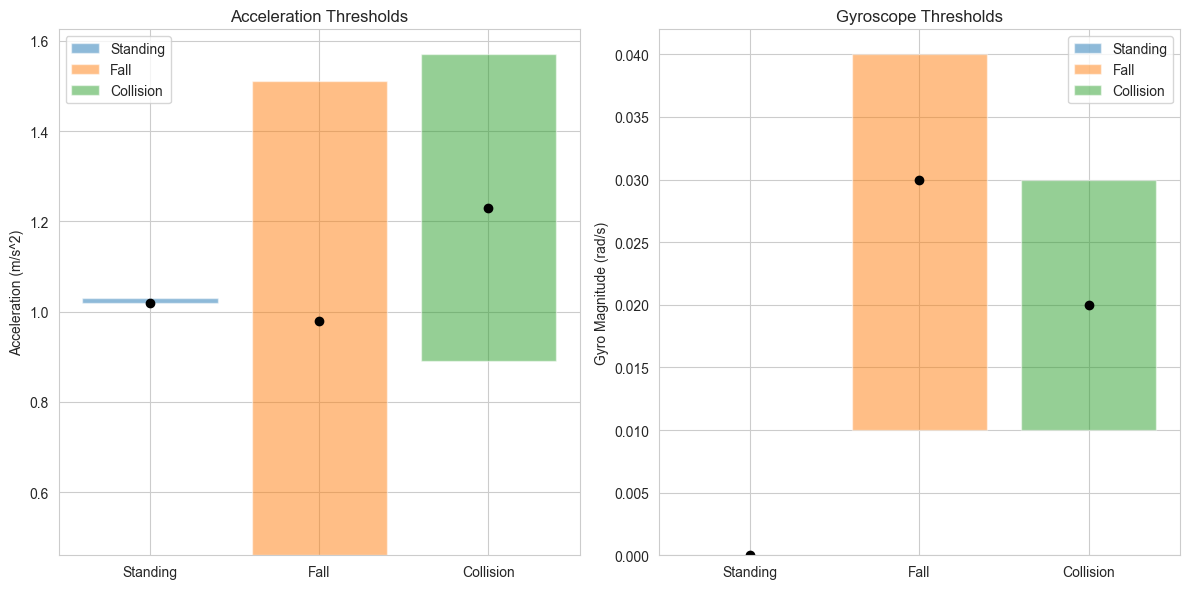

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample threshold data
data = {
    'Outcome': ['Standing', 'Fall', 'Collision'],
    'Acceleration_Mean': [1.02, 0.98, 1.23],
    'Acceleration_Min': [1.02, 0.46, 0.89],
    'Acceleration_Max': [1.03, 1.51, 1.57],
    'Gyro_Mean': [0.00, 0.03, 0.02],
    'Gyro_Min': [0.00, 0.01, 0.01],
    'Gyro_Max': [0.00, 0.04, 0.03]
}

df = pd.DataFrame(data)

# Set consistent color palette
colors = {
    'Standing': '#1f77b4',
    'Fall': '#ff7f0e',
    'Collision': '#2ca02c'
}

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.set_style("whitegrid")

# 1. Acceleration Thresholds
for i, row in df.iterrows():
    axs[0].bar(row['Outcome'], row['Acceleration_Max'] - row['Acceleration_Min'],
               bottom=row['Acceleration_Min'],
               color=colors[row['Outcome']], alpha=0.5, label=row['Outcome'] if row['Outcome'] not in axs[0].get_legend_handles_labels()[1] else "")
    axs[0].plot(row['Outcome'], row['Acceleration_Mean'], 'o', color='black')

axs[0].set_title("Acceleration Thresholds")
axs[0].set_ylabel("Acceleration (m/s^2)")
axs[0].legend()

# 2. Gyro Thresholds
for i, row in df.iterrows():
    axs[1].bar(row['Outcome'], row['Gyro_Max'] - row['Gyro_Min'],
               bottom=row['Gyro_Min'],
               color=colors[row['Outcome']], alpha=0.5, label=row['Outcome'] if row['Outcome'] not in axs[1].get_legend_handles_labels()[1] else "")
    axs[1].plot(row['Outcome'], row['Gyro_Mean'], 'o', color='black')

axs[1].set_title("Gyroscope Thresholds")
axs[1].set_ylabel("Gyro Magnitude (rad/s)")
axs[1].legend()

plt.tight_layout()
plt.savefig("Acceleration and momentum thresholds")
plt.show()
